# Available Data

In [3]:
import pandas as pd
import nltk
from nltk import word_tokenize

In [ ]:
a_train = pd.read_json('conala-corpus/conala-train.json')

### Annotated Conala training samples

In [13]:
a_train[:5]

,intent,question_id,rewritten_intent,snippet
0,How to convert a list of multiple integers int...,41067960,Concatenate elements of a list 'x' of multiple...,"sum(d * 10 ** i for i, d in enumerate(x[::-1]))"
1,How to convert a list of multiple integers int...,41067960,convert a list of integers into a single integer,"r = int(''.join(map(str, x)))"
2,how to convert a datetime string back to datet...,4170655,convert a DateTime string back to a DateTime o...,datetime.strptime('2010-11-13 10:33:54.227806'...
3,Averaging the values in a dictionary based on ...,29565452,get the average of a list values for each key ...,"[(i, sum(j) / len(j)) for i, j in list(d.items..."
4,zip lists in python,13704860,"zip two lists `[1, 2]` and `[3, 4]` into a lis...","zip([1, 2], [3, 4])"


In [9]:
for i in range(10):
    print("REWRITTEN INTENT: " + a_train.iloc[i]["rewritten_intent"])
    print("CODE: " + a_train.iloc[i]["snippet"])
    print()

REWRITTEN INTENT: Concatenate elements of a list 'x' of multiple integers to a single integer
CODE: sum(d * 10 ** i for i, d in enumerate(x[::-1]))

REWRITTEN INTENT: convert a list of integers into a single integer
CODE: r = int(''.join(map(str, x)))

REWRITTEN INTENT: convert a DateTime string back to a DateTime object of format '%Y-%m-%d %H:%M:%S.%f'
CODE: datetime.strptime('2010-11-13 10:33:54.227806', '%Y-%m-%d %H:%M:%S.%f')

REWRITTEN INTENT: get the average of a list values for each key in dictionary `d`)
CODE: [(i, sum(j) / len(j)) for i, j in list(d.items())]

REWRITTEN INTENT: zip two lists `[1, 2]` and `[3, 4]` into a list of two tuples containing elements at the same index in each list
CODE: zip([1, 2], [3, 4])

REWRITTEN INTENT: prepend string 'hello' to all items in list 'a'
CODE: ['hello{0}'.format(i) for i in a]

REWRITTEN INTENT: regex for repeating words in a string `s`
CODE: re.sub('(?<!\\S)((\\S+)(?:\\s+\\2))(?:\\s+\\2)+(?!\\S)', '\\1', s)

REWRITTEN INTENT: normali

In [8]:
print(len(a_train))

2379


### Mined Conala training samples

In [ ]:
mined_train = pd.read_json('conala-corpus/conala-mined.jsonl', lines=True)

In [15]:
mined_train[:5]

,id,intent,parent_answer_post_id,prob,question_id,snippet
0,34705205347052328,Sort a nested list by two elements,34705233,0.869000,34705205,"sorted(l, key=lambda x: (-int(x[1]), x[0]))"
1,13905936139059460,converting integer to list in python,13905946,0.852670,13905936,[int(x) for x in str(num)]
2,13837848138380410,Converting byte string in unicode string,13838041,0.852143,13837848,c.decode('unicode_escape')
3,23490152234901792,List of arguments with argparse,23490179,0.850829,23490152,"parser.add_argument('-t', dest='table', help='..."
4,272178227218070,How to convert a Date string to a DateTime obj...,2721807,0.840372,2721782,"datetime.datetime.strptime(s, '%Y-%m-%dT%H:%M:..."


Note these questions have a probability field, showing how likely the example is to be correct.

In [11]:
for i in range(5):
    print("INTENT: " + mined_train.iloc[i]["intent"])
    print("CODE: " + mined_train.iloc[i]["snippet"])
    print()

INTENT: Sort a nested list by two elements
CODE: sorted(l, key=lambda x: (-int(x[1]), x[0]))

INTENT: converting integer to list in python
CODE: [int(x) for x in str(num)]

INTENT: Converting byte string in unicode string
CODE: c.decode('unicode_escape')

INTENT: List of arguments with argparse
CODE: parser.add_argument('-t', dest='table', help='', nargs='+')

INTENT: How to convert a Date string to a DateTime object?
CODE: datetime.datetime.strptime(s, '%Y-%m-%dT%H:%M:%SZ')



In [ ]:
print(len(a_train))

In [36]:
plt.hist(mined_train["prob"], bins=30)
plt.title('Probability of Accuracy for Mined Samples')
plt.xlabel('Accuracy')
plt.ylabel('Occurances')

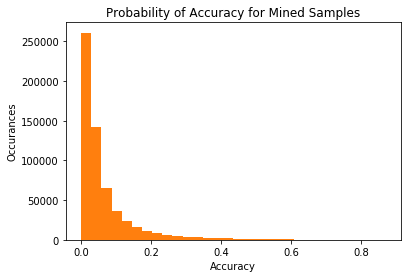

In [37]:
plt.show()

In [34]:
mined_train.describe()

,id,parent_answer_post_id,prob,question_id
count,5.938910e+05,5.938910e+05,593891.000000,5.938910e+05
mean,5.024786e+16,1.859959e+07,0.064413,1.672431e+07
std,9.187890e+16,1.260624e+07,0.085104,1.227807e+07
min,5.945950e+06,5.950000e+02,0.000030,5.020000e+02
25%,9.673907e+14,7.669063e+06,0.016376,6.196250e+06
50%,1.613794e+16,1.657090e+07,0.034263,1.416615e+07
75%,3.513231e+16,2.960653e+07,0.074638,2.565613e+07
max,4.276938e+17,4.277310e+07,0.869000,4.277182e+07


We see that the majority of samples in our dataset have a probability below 0.1

Let's see what samples with this level of probability look like.

In [63]:
import random

low_prob = mined_train.loc[mined_train['prob'] < 0.1]
high_prob = mined_train.loc[mined_train['prob'] > 0.6]

print("========= PROB > 60% =========")
print()
for i in range(5):
    rand = random.randint(0, len(high_prob))
    print("INTENT: " + high_prob.iloc[rand]["intent"])
    print("CODE: " + high_prob.iloc[rand]["snippet"])
    print("p=" + str(round(high_prob.iloc[rand]["prob"], 3)))
    print()
    
print ("========= PROB < 10% =========")
print()
for i in range(5):
    rand = random.randint(0, len(low_prob))
    print("INTENT: " + low_prob.iloc[rand]["intent"])
    print("CODE: " + low_prob.iloc[rand]["snippet"])
    print("p=" + str(round(low_prob.iloc[rand]["prob"], 3)))
    print()

========= PROB > 50% =========

INTENT: Extracting only characters from a string in Python
CODE: """ """.join(re.split('[^a-zA-Z]*', 'your string'))
p=0.656

INTENT: Array indexing in numpy
CODE: x[(np.arange(x.shape[0]) != 1), :, :]
p=0.674

INTENT: Dynamic order in django-mptt
CODE: Comment.objects.all().order_by('-hotness')
p=0.802

INTENT: Is there any way to fetch all field name of collection in mongodb?
CODE: db.coll.find({'fieldname': {'$exists': 1}}).count()
p=0.639

INTENT: URL encoding in python
CODE: urllib.parse.quote_plus('a b')
p=0.729

========= PROB < 10% =========

INTENT: Get a Try statement to loop around until correct value obtained
CODE: pass
p=0.033

INTENT: How to predict a continuous value (time) from text documents?
CODE: from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDRegressor
vect = TfidfVectorizer(input='filename')
p=0.001

INTENT: Dealing with db.Timeout on Google App Engine
CODE: def _decorator(func):
    pa

In [62]:
len(mined_train.loc[mined_train['prob'] > 0.6])

1116

### Potential concerns:

- Examples with a probability of less than 60% do not seem reasonably reliable to train on, but filtering these out we are left with only 1,116 datapoints.
- A lot of examples refer to obscure libraries. How will we gain information about all of these libraries?
- Not all intents have specified names or values for every variable necessary to produce code snippet.
    - How will these values be generated, and will this effect the accuracy score?
- Small dataset means our model will be familiar with a very limited number of situations.
    - We have approx 1116 mined + 2379 annoted examples, 3495 total useable samples

## Potential Alternative Datasets

#### StaQC https://github.com/LittleYUYU/StackOverflow-Question-Code-Dataset
Seems like the code snippets seem more accurate, but they are not limited in length. Probably too complex to generate. Potential work-arounds: subset this dataset to include only one-line snippets, or explore the methodolgy they used to mine our own code snippets.

#### EdinburgNLP https://github.com/LittleYUYU/StackOverflow-Question-Code-Dataset
Doc-to-code generation, BLEU score < 15%. This is more of a project than a dataset.

#### Pseudogen https://ahcweb01.naist.jp/pseudogen/
Also more of a project than a dataset. Generates pseudocode from python code.